# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [187]:
#See Analysis At The End#

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import os

#Import API key
from api_keys import weather_api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv" 

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [188]:
#List cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [189]:
setcounter=1
recordcounter=1
cityid=0

url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"

print("Beginning Data Retrieval \n ------------------")

citydatalist=[]

for city in cities:
    print(f"Processing Record {recordcounter} of Set {setcounter} | {city}")
    try:
        response = requests.get(url,params={"appid":weather_api_key,"units":units,"q":city}).json()
        citydatalist.append({
            "City_ID":cityid,
            "City":city,
            "Cloudiness":response["clouds"]["all"],
            "Country":response["sys"]["country"],
            "Date":response["dt"],
            "Humidity":response["main"]["humidity"],
            "Lat":response["coord"]["lat"],
            "Lng":response["coord"]["lon"],
            "Max Temp":response["main"]["temp_max"],
            "Wind Speed":response["wind"]["speed"]
        })
    except:
        print("City not found. Skipping...")
    if recordcounter==50:
        recordcounter=1
        setcounter=setcounter+1
    else:
        recordcounter=recordcounter+1
    cityid=cityid+1

print("------------------\nData Retrieval Complete\n------------------")

Beginning Data Retrieval 
 ------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 1 | hovd
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | elizabeth city
Processing Record 7 of Set 1 | ligayan
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | axim
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | hami
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | plettenberg bay
Processing Record 22 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:
citydata = pd.DataFrame(citydatalist)

citydata.count()

City_ID       585
City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

In [191]:
df = pd.read_csv (r'output_data/cities.csv')
print (df)

citydata_file = os.path.join('output_data/cities_1.csv')
df.to_csv(citydata_file)

citydata.head()

     City_ID         City  Cloudiness Country        Date  Humidity    Lat  \
0          0    ostrovnoy           2      RU  1558378754        72  68.05   
1          1    mahebourg          75      MU  1558378503        74 -20.41   
2          2      qaanaaq          25      GL  1558378755        73  77.48   
3          3       zhuhai           0      CN  1558378755        39  40.71   
4          4    cape town          20      ZA  1558378755        76 -33.93   
..       ...          ...         ...     ...         ...       ...    ...   
543      543       yabrud           0      SY  1558378840        32  33.97   
544      544      paraiso           5      MX  1558378898         4  24.01   
545      545      veraval           0      FR  1558378898        62  49.65   
546      546  novyy urgal         100      RU  1558378899        93  51.07   
547      547      tongren           4      CN  1558378899        64  27.72   

        Lng  Max Temp  Wind Speed  
0     39.51     37.50      

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,atuona,27,PF,1606560355,72,-9.80,-139.03,78.64,18.88
1,1,yellowknife,75,CA,1606560356,76,62.46,-114.35,-8.00,2.24
2,3,hovd,43,MN,1606560356,93,48.01,91.64,14.07,0.36
3,4,ribeira grande,40,PT,1606560356,66,38.52,-28.70,55.40,6.93
4,5,elizabeth city,90,US,1606560356,100,36.29,-76.25,55.00,4.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

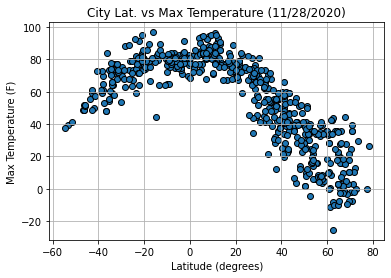

In [192]:
#Grab and format today's date for the graph titles
todaystring=str(pd.to_datetime(citydata.Date.mean(),unit='s'))
month=todaystring[5:7]
day=todaystring[8:10]
year=todaystring[0:4]
today=month+"/"+day+"/"+year

plt.scatter(citydata.Lat,citydata["Max Temp"],edgecolors="black")
plt.title(f"City Lat. vs Max Temperature ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_MaxTemp.png")

## Latitude vs. Humidity Plot

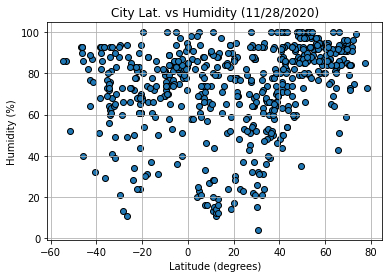

In [193]:
plt.scatter(citydata.Lat,citydata.Humidity,edgecolors="black")
plt.title(f"City Lat. vs Humidity ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_Humidity.png")

## Latitude vs. Cloudiness Plot

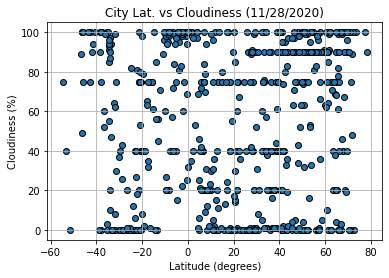

In [196]:
plt.scatter(citydata.Lat,citydata.Cloudiness,edgecolors="black")
plt.title(f"City Lat. vs Cloudiness ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_Cloudiness.png")

## Latitude vs. Wind Speed Plot

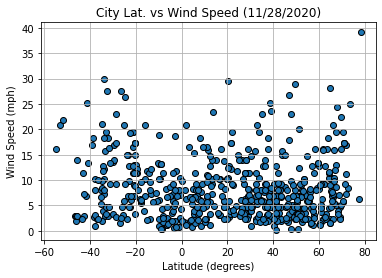

In [197]:
plt.scatter(citydata.Lat,citydata["Wind Speed"],edgecolors="black")
plt.title(f"City Lat. vs Wind Speed ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_WindSpeed.png")

## Linear Regression

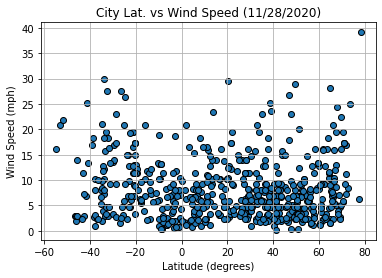

In [198]:
plt.scatter(citydata.Lat,citydata["Wind Speed"],edgecolors="black")
plt.title(f"City Lat. vs Wind Speed ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_WindSpeed.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [199]:
#Creating Northern Hemisphere DataFrame
northerncitydata = df.loc[df["Lat"] >= 0]
northerncitydata

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


The r-squared is: [-0.8151657406810829]


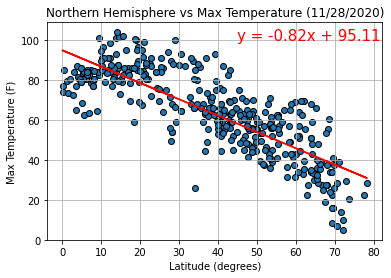

In [200]:
#Use for reference - Northern Hemisphere DataFrame 
# northerncitydata = df.loc[df["Lat"] >= 0]
# northerncitydata

from scipy.stats import linregress

y = northerncitydata["Max Temp"]
x = northerncitydata["Lat"]
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northerncitydata['Lat'],northerncitydata['Max Temp'],edgecolors='k')
plt.ylabel("Max Temperature (F)")
plt.plot(x, regression_values, "red")
plt.xlabel("Latitude (degrees)")
plt.title(f"Northern Hemisphere vs Max Temperature ({today})")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.plot(x, regression_values,"r-")
plt.annotate((line_eq),(45,100),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")      

plt.savefig("output_data/NorthernCityLat_v_MaxTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [201]:
#Creating Southern Hemisphere DataFrame
southerncitydata = df.loc[df["Lat"] >= 0]
southerncitydata

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


The r-squared is: [-0.8151657406810829]


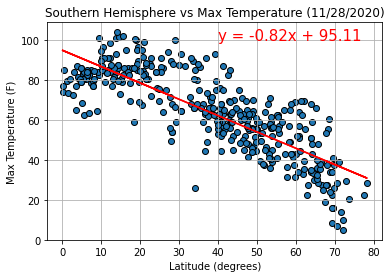

In [202]:
#Use for reference - Southern Hemisphere DataFrame
# southerncitydata = df.loc[df["Lat"] >= 0]
# southerncitydata

y = southerncitydata["Max Temp"]
x = southerncitydata["Lat"]
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southerncitydata['Lat'],southerncitydata['Max Temp'],edgecolors='k')
plt.ylabel("Max Temperature (F)")
plt.plot(x, regression_values, "red")
plt.xlabel("Latitude (degrees)")
plt.title(f"Southern Hemisphere vs Max Temperature ({today})")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.plot(x, regression_values,"r-")
plt.annotate((line_eq),(40,100),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")      

plt.savefig("output_data/SouthernCityLat_v_MaxTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


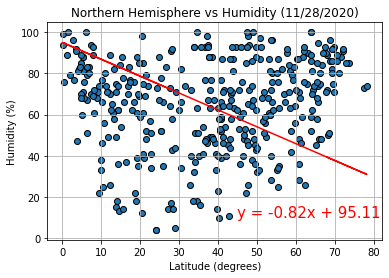

In [203]:
x = northerncitydata.Lat
y = northerncitydata.Humidity

plt.scatter(northerncitydata['Lat'],northerncitydata['Humidity'],edgecolors='k')
plt.title(f"Northern Hemisphere vs Humidity ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")       

plt.savefig("output_data/NorthernCityLat_v_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


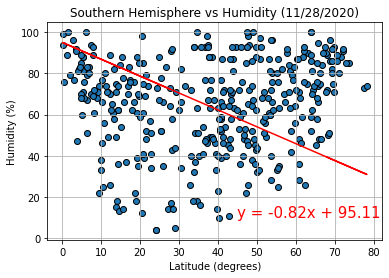

In [204]:
x = southerncitydata.Lat
y = southerncitydata.Humidity

plt.scatter(southerncitydata['Lat'],southerncitydata['Humidity'],edgecolors='k')
plt.title(f"Southern Hemisphere vs Humidity ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")       

plt.savefig("output_data/SouthernCityLat_v_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


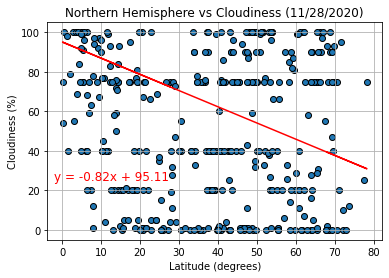

In [205]:
x = northerncitydata.Lat
y = northerncitydata.Cloudiness

plt.scatter(northerncitydata['Lat'],northerncitydata['Cloudiness'],edgecolors='k')
plt.title(f"Northern Hemisphere vs Cloudiness ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(-2,25),fontsize=12,color="red")

print(f"The r-squared is: {[rvalue]}")

plt.savefig("output_data/NorthernCityLat_v_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


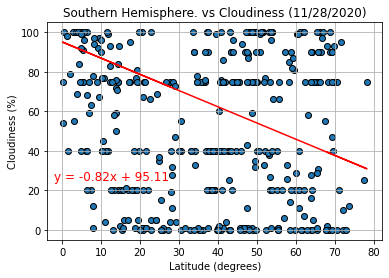

In [206]:
x = southerncitydata.Lat
y = southerncitydata.Cloudiness

plt.scatter(southerncitydata['Lat'],southerncitydata['Cloudiness'],edgecolors='k')
plt.title(f"Southern Hemisphere. vs Cloudiness ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(-2,25),fontsize=12,color="red")

print(f"The r-squared is: {[rvalue]}")

plt.savefig("output_data/SouthernCityLat_v_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


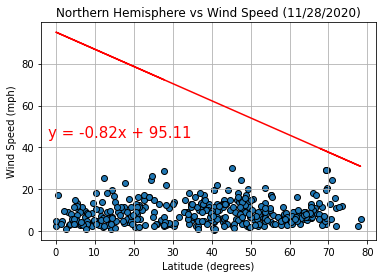

In [207]:
x = northerncitydata.Lat
y = northerncitydata["Wind Speed"]

plt.scatter(northerncitydata['Lat'],northerncitydata['Wind Speed'],edgecolors='k')
plt.title(f"Northern Hemisphere vs Wind Speed ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(-2,45),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")

plt.savefig("output_data/NorthernCityLat_v_WindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


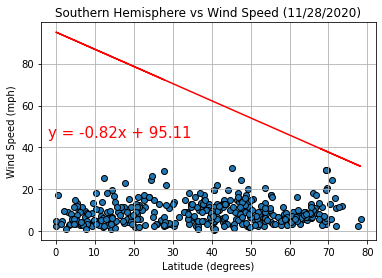

In [208]:
x = southerncitydata.Lat
y = southerncitydata["Wind Speed"]

plt.scatter(southerncitydata['Lat'],southerncitydata['Wind Speed'],edgecolors='k')
plt.title(f"Southern Hemisphere vs Wind Speed ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(-2,45),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")

plt.savefig("output_data/SouthernCityLat_v_WindSpeed.png")

### Analysis

* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be warmer this time of year than the southern hemisphere. This may be due to the tilt of the earth.

* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.

* There is no strong relationship between latitude and wind speed. However, in northern hemisphere, there is a flurry of cities with over 20 mph of wind.
